# Flight Data Exploration


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from google.colab import drive
drive.mount('/content/drive')

pd.set_option("display.max_columns", 500)
plt.style.use("seaborn-colorblind")
pal = sns.color_palette()

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks/flight-delay-dataset-20182022' | grep parquet

Combined_Flights_2018.parquet
Combined_Flights_2019.parquet
Combined_Flights_2020.parquet
Combined_Flights_2021.parquet
Combined_Flights_2022.parquet


## Read in and Format Data

In [ ]:
parquet_files = glob('/content/drive/My Drive/Colab Notebooks/flight-delay-dataset-20182022/Combined_Flights*.parquet')
parquet_files

['/content/drive/My Drive/Colab Notebooks/flight-delay-dataset-20182022/Combined_Flights_2018.parquet',
 '/content/drive/My Drive/Colab Notebooks/flight-delay-dataset-20182022/Combined_Flights_2019.parquet',
 '/content/drive/My Drive/Colab Notebooks/flight-delay-dataset-20182022/Combined_Flights_2020.parquet',
 '/content/drive/My Drive/Colab Notebooks/flight-delay-dataset-20182022/Combined_Flights_2021.parquet',
 '/content/drive/My Drive/Colab Notebooks/flight-delay-dataset-20182022/Combined_Flights_2022.parquet']

In [ ]:
# Check the column names in one of the parquet files
data18 = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/flight-delay-dataset-20182022/Combined_Flights_2018.parquet')
data18.head()


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1256.0,0.0,38.0,62.0,59.0,145.0,2018,1,1,23,2,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8928A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,14.0,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1258.0,0.0,36.0,62.0,61.0,145.0,2018,1,1,24,3,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,13.0,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,1302.0,0.0,40.0,62.0,69.0,145.0,2018,1,1,25,4,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8836A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,18.0,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0.0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,1253.0,0.0,35.0,62.0,63.0,145.0,2018,1,1,26,5,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,17.0,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0.0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,1459.0,0.0,36.0,60.0,64.0,145.0,2018,1,1,27,6,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8839E,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1400-1459,17.0,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0.0


In [ ]:
data18.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [ ]:
# Dataframe Creation

column_subset = [
    "FlightDate",
    "Quarter",
    "DayofMonth",
    "DayOfWeek",
    "Airline",
    "Origin",
    "Dest",
    'IATA_Code_Operating_Airline',
    'Distance',
    "Cancelled",
    "CRSDepTime",
    "DepDelayMinutes",
    'DepDel15',
    'ArrDel15',
    "OriginCityName",
    "DestCityName",
    "TaxiOut",
    "TaxiIn",
    "CRSArrTime",
    "ArrDelayMinutes",
]

In [ ]:
dfs = []
for f in parquet_files:
    dfs.append(pd.read_parquet(f, columns=column_subset))
df = pd.concat(dfs).reset_index(drop=True)

cat_cols = ["Airline", "Origin", "OriginCityName", "DestCityName",]
for c in cat_cols:
    df[c] = df[c].astype("category")

In [ ]:
df.head()

,FlightDate,Quarter,DayofMonth,DayOfWeek,Airline,Origin,Dest,IATA_Code_Operating_Airline,Distance,Cancelled,CRSDepTime,DepDelayMinutes,DepDel15,ArrDel15,OriginCityName,DestCityName,TaxiOut,TaxiIn,CRSArrTime,ArrDelayMinutes
0,2018-01-23,1,23,2,Endeavor Air Inc.,ABY,ATL,9E,145.0,False,1202,0.0,0.0,0.0,"Albany, GA","Atlanta, GA",14.0,7.0,1304,0.0
1,2018-01-24,1,24,3,Endeavor Air Inc.,ABY,ATL,9E,145.0,False,1202,0.0,0.0,0.0,"Albany, GA","Atlanta, GA",13.0,12.0,1304,0.0
2,2018-01-25,1,25,4,Endeavor Air Inc.,ABY,ATL,9E,145.0,False,1202,0.0,0.0,0.0,"Albany, GA","Atlanta, GA",18.0,11.0,1304,0.0
3,2018-01-26,1,26,5,Endeavor Air Inc.,ABY,ATL,9E,145.0,False,1202,0.0,0.0,0.0,"Albany, GA","Atlanta, GA",17.0,11.0,1304,0.0
4,2018-01-27,1,27,6,Endeavor Air Inc.,ABY,ATL,9E,145.0,False,1400,0.0,0.0,0.0,"Albany, GA","Atlanta, GA",17.0,11.0,1500,0.0


In [ ]:
# Number of rows and columns
num_rows, num_cols = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')

Number of rows: 29193782
Number of columns: 20


In [ ]:
# 'ArrDel15' Arrival Delay Indicator, 15 Minutes or More (1=Yes)
# 'DepDel15' Departure Delay Indicator, 15 Minutes or More (1=Yes)


## Understand the `DepDelayMinutes` Variable

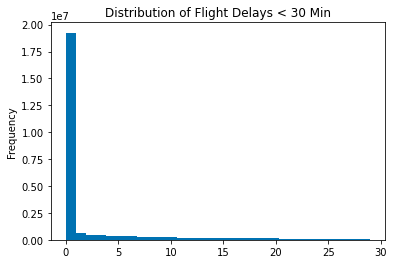

In [ ]:
df.query("DepDelayMinutes < 30")["DepDelayMinutes"].plot(
  kind="hist", bins=30, title="Distribution of Flight Delays < 30 Min"
)
plt.show()

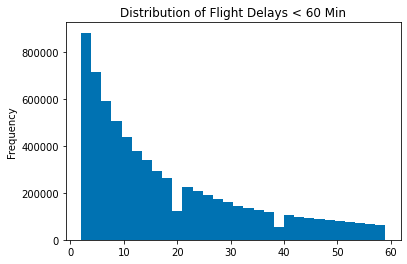

In [ ]:
df.query("DepDelayMinutes > 1 and DepDelayMinutes < 60")["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays < 60 Min"
)
plt.show()

## Grouping of Delays
```
Delays are divided into 3 categories: "on time or small delay" (up to 15 minutes delay), "Medium delay" (15 – 45 minutes delay) and "Large delay" (45 minutes delay). 
```
source:https://en.wikipedia.org/wiki/Flight_cancellation_and_delay


In [ ]:
df["DelayGroup"] = None
df.loc[df["DepDelayMinutes"] == 0, "DelayGroup"] = "OnTime_Early"
df.loc[
    (df["DepDelayMinutes"] > 0) & (df["DepDelayMinutes"] <= 15), "DelayGroup"
] = "Small_Delay"
df.loc[
    (df["DepDelayMinutes"] > 15) & (df["DepDelayMinutes"] <= 45), "DelayGroup"
] = "Medium_Delay"
df.loc[df["DepDelayMinutes"] > 45, "DelayGroup"] = "Large_Delay"
df.loc[df["Cancelled"], "DelayGroup"] = "Cancelled"

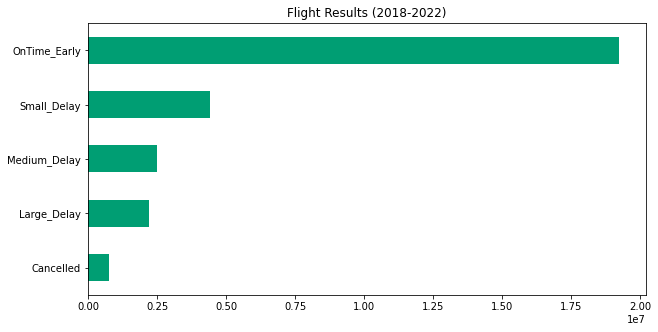

In [ ]:
df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(10, 5), color=pal[1], title="Flight Results (2018-2022)"
)
plt.show()

## How Many Flights Per Year?

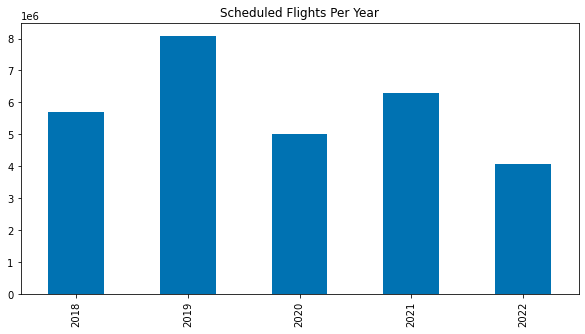

In [ ]:
df["Year"] = df['FlightDate'].dt.year
df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year"
)
plt.show()

## What is the % of Flight Results by Year

In [ ]:
df["Year"] = df["FlightDate"].dt.year
df_agg = df.groupby("Year")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Greens")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Year,,,,,
2018,64.115615,16.474583,9.538448,8.317789,1.553565
2019,64.619787,15.716778,9.081583,8.683248,1.898604
2020,76.052291,9.653418,4.572319,3.727722,5.994249
2021,65.698142,16.145308,8.917879,7.479795,1.758876
2022,58.801153,17.706368,10.926539,9.545283,3.020657


## Results by Month

In [ ]:
df["Month"] = df["FlightDate"].dt.month
df_agg = df.groupby("Month")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,68.169907,13.961832,7.878093,7.008976,2.981192
2,64.960611,15.300969,8.828322,7.786858,3.123240
3,66.363322,14.172305,7.716007,6.173113,5.575252
4,64.436275,14.051844,7.824258,6.853866,6.833756
5,65.023841,16.224252,8.965554,7.875154,1.911198
6,59.488265,17.349791,10.754222,10.442093,1.965629
7,61.996702,16.361900,10.052315,9.906083,1.683000
8,64.622096,15.009025,9.096512,9.137345,2.135022
9,72.924881,13.140776,6.725733,5.813787,1.394822


## Exclude 2020

In [ ]:
df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("Year != 2020")
    .groupby("Month")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,67.162457,13.880797,8.068641,7.353867,3.534239
2,62.623134,15.912800,9.424684,8.139587,3.899795
3,65.869000,16.332230,8.904784,7.101697,1.792290
4,66.161402,15.715543,8.783821,7.685515,1.653719
5,63.468665,17.070321,9.537899,8.407955,1.515159
6,56.855480,18.188167,11.525967,11.298683,2.131703
7,58.511717,17.645319,11.048691,10.968325,1.825949
8,60.348823,16.490201,10.289753,10.508081,2.363141
9,70.637088,14.016242,7.374660,6.454308,1.517702


## Why High Cancellation in March/April? What does it look like by year for these months?

In [ ]:
df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("3 <= Month <= 4")
    .groupby("Year")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Oranges", axis=0)

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Year,,,,,
2018,64.219260,17.194531,9.582907,7.347652,1.655651
2019,65.790141,15.462990,8.614418,7.974924,2.157527
2020,63.063286,6.202543,3.291875,2.733237,24.709059
2021,76.291254,13.015721,5.715776,4.077733,0.899516
2022,59.301505,18.234213,11.096981,9.445164,1.922137


## Plot using `calmap`

In [ ]:
!pip install calmap plotly_calplot -q

     |████████████████████████████████| 17.3 MB 4.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.1 which is incompatible.


Text(0.5, 0.92, 'US Flight Cancellations')

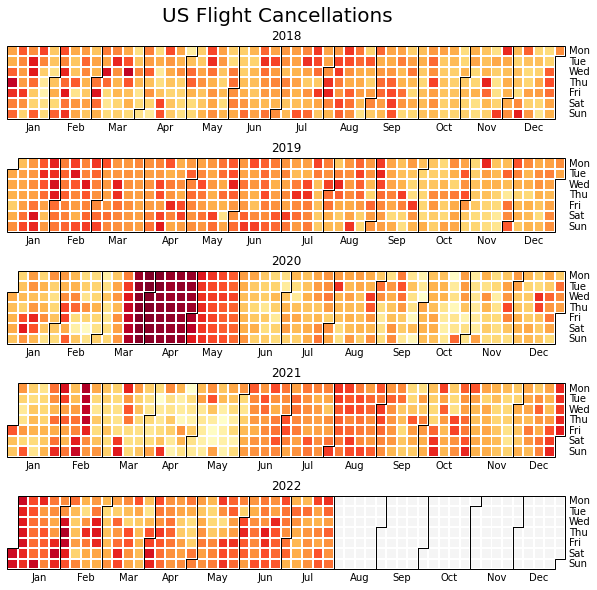

In [ ]:
import calmap
events = df.groupby("FlightDate")["Cancelled"].mean()
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):
    calmap.yearplot(
        events.apply(np.log), year=year, cmap="YlOrRd", monthly_border=True, ax=axs[i]
    )
    axs[i].set_title(year)
fig.patch.set_facecolor("white")
fig.suptitle("US Flight Cancellations", y=0.92, fontsize=20)

## Interactive Calendar Heatmap

In [ ]:
from plotly_calplot import calplot

# creating the plot
fig = calplot(events.apply(np.log).reset_index(), x="FlightDate", y="Cancelled")
fig.show()

## Compare Airlines
- Who has the most delays?
- Who has the most cancellations?
- Who is the most reliable? (on time)

Text(0.5, 0, 'Flights (100k)')

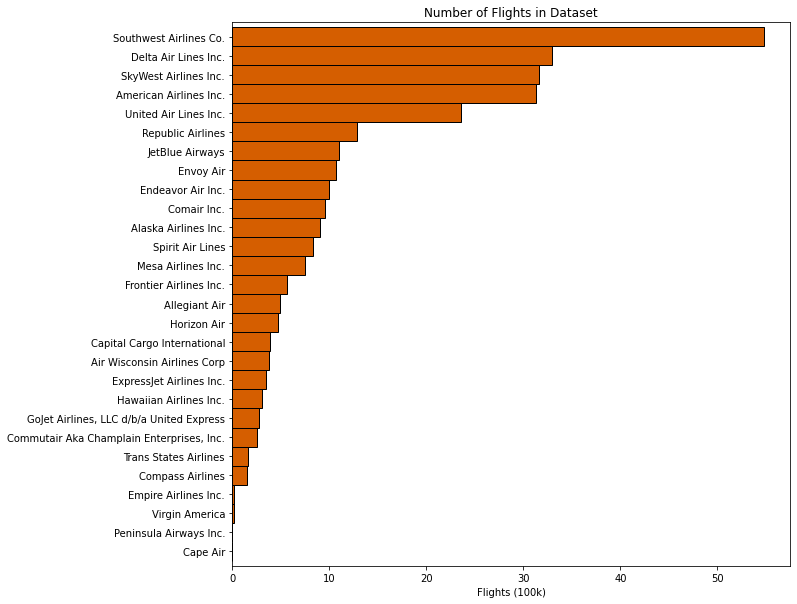

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
airlines_ordered = (df["Airline"].value_counts(ascending=True) / 100_000).plot(
    kind="barh", ax=ax, color=pal[2], width=1, edgecolor="black"
)
ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (100k)")

## Subset to the Top Airlines
- Minimum 1M Flights

In [ ]:
top_airlines = (
    df["Airline"]
    .value_counts()
    .reset_index()
    .query("Airline > 1_000_000")["index"]
    .values.tolist()
)

df_top = df.loc[df["Airline"].isin(top_airlines)].reset_index(drop=True).copy()

In [ ]:
# Reset airline categories
df_top["Airline"] = df_top["Airline"].astype("str").astype("category")

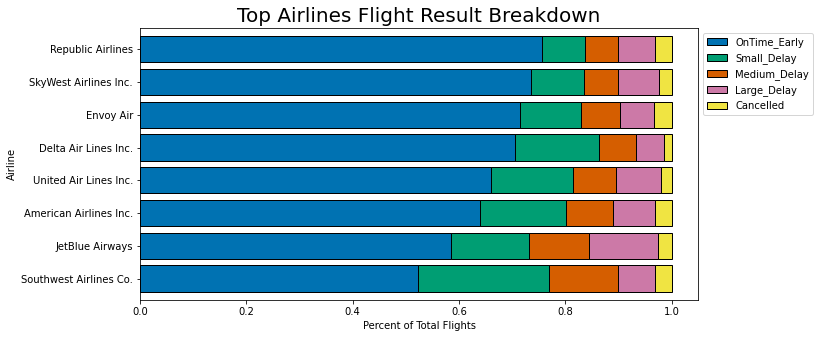

In [ ]:
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg = (
    df_top.groupby(["Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

## Split out Each Delay Type and plot

In [ ]:
delay_mapping = {
    "OnTime_Early": "Good",
    "Small_Delay": "Good",
    "Medium_Delay": "Bad",
    "Large_Delay": "Bad",
    "Cancelled": "Bad",
}

In [ ]:
df_top["DelayOk"] = df_top["DelayGroup"].map(delay_mapping)

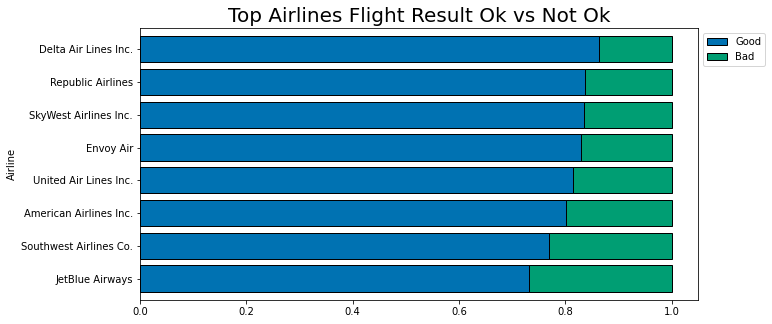

In [ ]:
df_agg = (
    df_top.groupby(["Airline"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("Good").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Ok vs Not Ok", fontsize=20)

plt.show()

## Proportion of Average Delayed Flights by Month and Airline

<Figure size 1080x360 with 0 Axes>

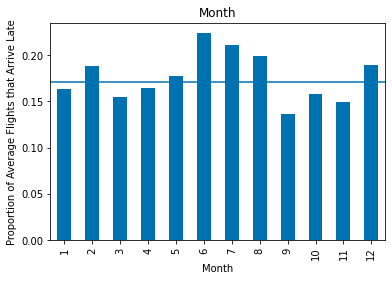

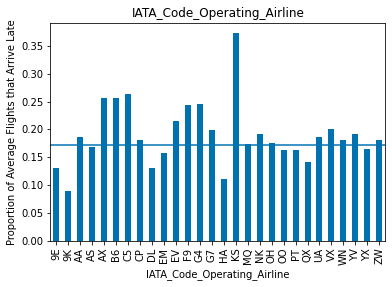

In [ ]:
# Proportion of late flights per category based on all other flights

avgLate = np.sum(df['ArrDel15'])/len(df['ArrDel15'])
attributes = ['Month','IATA_Code_Operating_Airline']
for i,pred in enumerate(attributes):
    plt.figure(i, figsize=(15, 5))
    group = df.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'ArrDel15']]
    group.sort_values(by=pred, inplace=True)    
    group.plot.bar(x=pred, y='ArrDel15')
    plt.axhline(y=avgLate, label='Average')
    plt.ylabel('Proportion of Average Flights that Arrive Late')
    plt.title(pred)
    plt.legend().remove()

###Exploratory analysis reveals:
(1) Delay changes slightly with Month e.g. lower delays in Autumn months

(2) Not much variation within week and day of month (slightly higher delays in the last few days of month)

Create Random Sample

In [ ]:
# sampled_df1 = df[df['ArrDel15']==True].sample(n=500, random_state=21067440)
# sampled_df2 = df[df['ArrDel15']==False].sample(n=500, random_state=21067440)

# sampled_df = pd.concat([sampled_df1, sampled_df2], ignore_index=True)

# # sampled_df.shape
# sampled_df.head()

# # Write to a csv file
# save_path = "/content/drive/My Drive/Colab Notebooks/"
# sampled_df.to_csv(save_path +"sampled.csv", index=False)